# Ensemble Learning and Random Forests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
###################################################################################################################
#                                   ''' Import the iris dataset '''                                    
###################################################################################################################
from sklearn.datasets import make_moons
from sklearn.model_selection import StratifiedShuffleSplit

X, y = make_moons(n_samples=1000, noise=0.2)

df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Y'] = pd.Series(y)

X_train, y_train, X_test, y_test = [
    df.loc[0:800,['X1', 'X2']], 
    df.loc[0:800,['Y']],
    df.loc[801:1000,['X1', 'X2']], 
    df.loc[801:1000,['Y']]]


In [25]:
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df["X1"]):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]
#     # drop the 'income_category' field
# #     for set_ in (strat_train_set, strat_test_set):
# #         set_.drop("X1", axis=1, inplace=True)
        
# df = strat_train_set.copy()


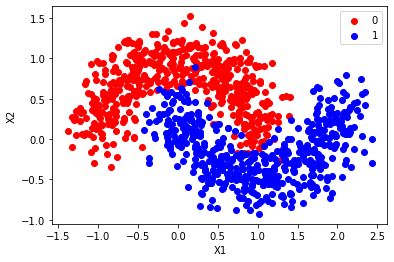

In [26]:
plt.scatter(df[df['Y']==0]['X1'], df[df['Y']==0]['X2'], label='0', color='red')
plt.scatter(df[df['Y']==1]['X1'], df[df['Y']==1]['X2'], label='1', color='blue')

# Prettify the graph
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

# # scale
# plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x1 scale by own
# plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x2 scale by own

# display
plt.show()

In [27]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '

LogisticRegression 0.8793969849246231
RandomForestClassifier 0.964824120603015


/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC 0.9748743718592965
VotingClassifier 0.9748743718592965
